#### Load Depedency

In [3]:
import math
import matplotlib.pyplot as plt

#### Load Dataset

In [4]:
X = [12.3,14.3,14.5,14.8,16.1,16.8,16.5,15.3,17.0,17.8,18.7,20.2,22.3,19.3,15.5,16.7,17.2,18.3,19.2,17.3,19.5,19.7,21.2,23.04,23.8,24.6,25.2,25.7,25.9,26.3]
y = [11.8,12.7,13.0,11.8,14.3,15.3,13.5,13.8,14.0,14.9,15.7,18.8,20.1,15.0,14.5,14.9,14.8,16.4,17.0,14.8,15.6,16.4,19.0,19.8,20.0,20.3,21.9,22.1,22.4,22.6]

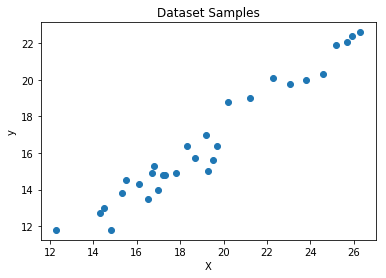

In [5]:
plt.scatter(X, y)
plt.title('Dataset Samples')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Split dataset into trainset and testset

In [6]:
X_train = X[0:20]
y_train = y[0:20]
n_train = len(X_train)

X_test = X[20:]
y_test = y[20:]
n_test = len(X_test)

#### Fit model: y = wx + b

In [7]:
epoches = 10000000
# model parameters
w1 = -0.1
w2 = 0.1
w3 = -0.1
w4 = 0.1
w5 = 0.1
b = 0.3

# initialize as 0.0 (not parameter!)
lr_w1 = 0.0
lr_w2 = 0.0
lr_w3 = 0.0
lr_w4 = 0.0
lr_w5 = 0.0
lr_b = 0.0

# Hyperparameter
reg = 100000

In [8]:
for epoch in range(epoches):
    sum_w1 = 0.0
    sum_w2 = 0.0
    sum_w3 = 0.0
    sum_w4 = 0.0
    sum_w5 = 0.0
    
    sum_b = 0.0
    
    for i in range(n_train):
        y_hat = w1 * X_train[i] + w2 * (X_train[i] ** 2) + w3 * (X_train[i] ** 3) + w4 * (X_train[i] ** 4) + w5 * (X_train[i] ** 5) + b
        sum_w1 = sum_w1 - (y_train[i] - y_hat) * (X_train[i] ** 1)
        sum_w2 = sum_w2 - (y_train[i] - y_hat) * (X_train[i] ** 2)
        sum_w3 = sum_w3 - (y_train[i] - y_hat) * (X_train[i] ** 3)
        sum_w4 = sum_w4 - (y_train[i] - y_hat) * (X_train[i] ** 4)
        sum_w5 = sum_w5 - (y_train[i] - y_hat) * (X_train[i] ** 5)
        sum_b = sum_b - (y_train[i] - y_hat)
    
    '''
    # Using Gradient Descent to update parameters(w, b)
    det_w1 = 2.0 * sum_w1
    det_w2 = 2.0 * sum_w2
    det_w3 = 2.0 * sum_w3
    det_w4 = 2.0 * sum_w4
    det_w5 = 2.0 * sum_w5
    det_b = 2.0 * sum_b
    
    w1 = w1 - lr * det_w1
    w2 = w2 - lr * det_w2
    w3 = w3 - lr * det_w3
    w4 = w4 - lr * det_w4
    w4 = w5 - lr * det_w5
    b = b - lr * det_b
    '''
    
    
    # Adam --- epoches = 10
    det_w1 = 2.0 * sum_w1 + 2 * reg * w1
    det_w2 = 2.0 * sum_w2 + 2 * reg * w2
    det_w3 = 2.0 * sum_w3 + 2 * reg * w3
    det_w4 = 2.0 * sum_w4 + 2 * reg * w4
    det_w5 = 2.0 * sum_w5 + 2 * reg * w5
    det_b = 2.0 * sum_b

    lr_w1 = lr_w1 + det_w1 ** 2
    lr_w2 = lr_w2 + det_w2 ** 2
    lr_w3 = lr_w3 + det_w3 ** 2
    lr_w4 = lr_w4 + det_w4 ** 2
    lr_w5 = lr_w5 + det_w5 ** 2
    
    lr_b = lr_b + det_b ** 2
    
    w1 = w1 - (1 / math.sqrt(lr_w1) * det_w1)
    w2 = w2 - (1 / math.sqrt(lr_w2) * det_w2)
    w3 = w3 - (1 / math.sqrt(lr_w3) * det_w3)
    w4 = w4 - (1 / math.sqrt(lr_w4) * det_w4)
    w5 = w5 - (1 / math.sqrt(lr_w5) * det_w5)
    b = b - (1 / math.sqrt(lr_b) * det_b)
    

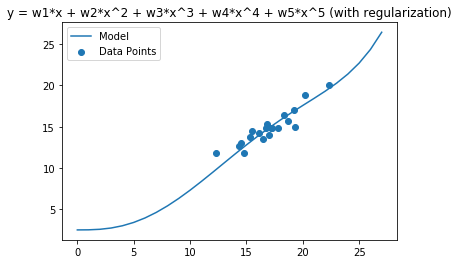

In [11]:
fig, ax = plt.subplots()
ax.plot([i for i in range(28)], [w1*i+ w2*(i**2)+ w3*(i**3)+ w4*(i**4)+w5*(i**5) + b for i in range(28)])
ax.scatter(X_train, y_train)
plt.title('y = w1*x + w2*x^2 + w3*x^3 + w4*x^4 + w5*x^5 (with regularization)')
plt.legend(('Model','Data Points'), loc='upper left')
plt.show()

In [12]:
total_loss_train = 0
for i in range(n_train):
    y_hat = y_hat = w1 * X_train[i] + w2 * (X_train[i] ** 2) + w3 * (X_train[i] ** 3) + w4 * (X_train[i] ** 4) + w5 * (X_train[i] ** 5) + b
    total_loss_train += (y_hat - y_train[i]) ** 2

total_loss_test = 0
for i in range(n_test):
    y_hat = y_hat = w1 * X_test[i] + w2 * (X_test[i] ** 2) + w3 * (X_test[i] ** 3) + w4 * (X_test[i] ** 4) + w5 * (X_test[i] ** 5) + b
    total_loss_test += (y_hat - y_test[i]) ** 2

In [13]:
total_loss_train

16.091014778613104

In [14]:
total_loss_test

20.90130647125067